# Titanic Data Analysis

## First Step - look over the data

I am going to look over the given data so that I could brainstorm some interesting questions. My guess on Titanic data is 'survivability'. 
  
- **given data file**: titanic-data.csv
- **libraries**: pandas, numpy, matplotlib

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

titanic_df = pd.read_csv('titanic-data.csv')

pandas Dataframe has good functions to briefly inspect such as 'head()' or 'describe()'.

In [2]:
titanic_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


Here, I just displayed one row (record) or the data to find out what columns are available. I think It is very nice approach to inspect only kinds of columns without actual data for brainstorming. I could be overwhelmed if I have to look through all the records at the first time.

Field Explanation (from Kaggle)
- **survival** : Survival (0 = No, 1 = Yes)
- **pclass** : Ticket class (1 = 1st/Upper, 2 = 2nd/Middle, 3 = 3rd/Lower)
- **sex** : Sex
- **Age** : Age in years
- **sibsp** : # of siblings / spouses aboard the Titanic (siblings = brother/sister/stepbrother/stepsister, spouse = husband/wife)
- **parch** : # of parents / children aboard the Titanic (parent = mother/father, child = daughter/son/stepdaughter/stepson)
  - some children travelled only with a nanny, therefore parch=0 for them
- **ticket** : Ticket number
- **fare** : Passenger fare
- **cabin** : Cabin number
- **embarked** : Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [3]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Q1. Relationship between Pclass and Survived
### - upper class people tended to be survived with more chance?

In [4]:
mean_survive_by_class = titanic_df.groupby('Pclass')['Survived'].mean()
mean_survive_by_class

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

[<matplotlib.text.Text at 0x10de22c10>, <matplotlib.text.Text at 0x10dc65dd0>]

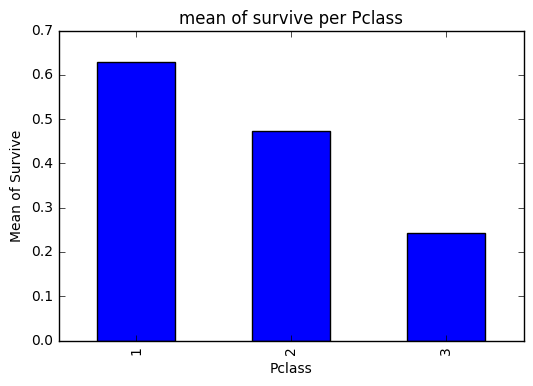

In [5]:
mean_survive_by_class_plot = mean_survive_by_class.plot(kind='bar', title='mean of survive per Pclass', x='a')
mean_survive_by_class_plot.set(xlabel='Pclass', ylabel='Mean of Survive')

Looks like people in higher class had more chance to survive than comparatively lower class. It seems reasonable back in time that rich people could afford better class. 

From the movie, Titanic, However, I remember crews tended to rescue elders, childs, girls in higher priority regardless of their classes. Was the movie telling a lie? or even though they did so in real, rich (high class) could buy off the seats? I am getting curious.

# Q2. Age and sex of people survived in each class
### - elder, youger people had more chance to survive?

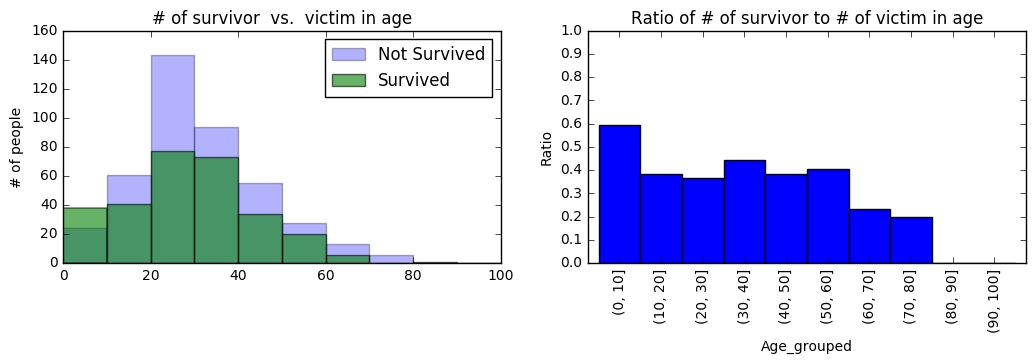

In [16]:
total_bin = 10

groups = titanic_df.groupby("Survived")["Age"]
fig, ax = plt.subplots(1, 2, figsize=(11, 3))
for key, value in groups:
    # remove NA data from the graph
    value = value.dropna()
    
    if key==0:
        value.plot.hist(label='Not Survived', alpha=.3, ax=ax[0], bins=total_bin, range=(0, 100))
    else:
        value.plot.hist(label='Survived', alpha=.6, ax=ax[0], bins=total_bin, range=(0, 100))

ax[0].set_title('# of survivor  vs.  victim in age')
ax[0].set_ylabel('# of people')
ax[0].legend()

titanic_df["Age_grouped"] = pd.cut(titanic_df["Age"], range(0, 105, 10)).dropna()
titanic_df.groupby("Age_grouped")["Survived"].mean().plot.bar(ax=ax[1], width=1.0)

ax[1].set_title('Ratio of # of survivor to # of victim in age')
ax[1].set_yticks(np.arange(0, 1.1, 0.1))
ax[1].set_ylabel('Ratio')

fig.subplots_adjust(right=1)
plt.show()

Figure1 shows the number of people with two groups, blue bars for victims and green bars for survivors. Figure2 shows the ratio of the number of survivor to the number of victim in each age group, so higher ratio means there were more people survived than died. 

It doesn't seem like there were much difference between each age group for surviving change. I think this trend applies to each class as well, so I assume that survavability for each class is not influenced much by age.

By the way,
I was expecting that young(0 to 20) and old people(60-70) could have survived with more chance than the people in age between 20 to 60. I thought so because young and old people were rescued in the movie, the titanic.

I am curious if this trend is consistent for each class anyway, so...

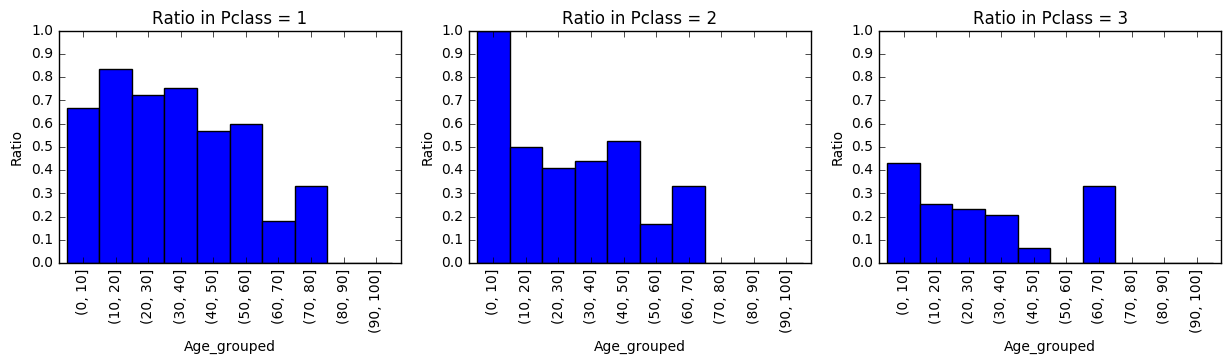

In [65]:
groups = titanic_df.groupby(["Survived", "Pclass"])["Age"]
fig, ax = plt.subplots(1, 3, figsize=(15, 3))

titanic_df["Age_grouped"] = pd.cut(titanic_df["Age"], range(0, 105, 10)).dropna()
class1 = titanic_df[titanic_df["Pclass"] == 1].groupby("Age_grouped")["Survived"].mean()
class2 = titanic_df[titanic_df["Pclass"] == 2].groupby("Age_grouped")["Survived"].mean()
class3 = titanic_df[titanic_df["Pclass"] == 3].groupby("Age_grouped")["Survived"].mean()

class1.plot.bar(ax=ax[0], width=1.0)
class2.plot.bar(ax=ax[1], width=1.0)
class3.plot.bar(ax=ax[2], width=1.0)

ax[0].set_title('Ratio in Pclass = 1')
ax[1].set_title('Ratio in Pclass = 2')
ax[2].set_title('Ratio in Pclass = 3')

ax[0].set_yticks(np.arange(0, 1.1, 0.1))
ax[1].set_yticks(np.arange(0, 1.1, 0.1))
ax[2].set_yticks(np.arange(0, 1.1, 0.1))

ax[0].set_ylabel('Ratio')
ax[1].set_ylabel('Ratio')
ax[2].set_ylabel('Ratio')

plt.show()

I think my guess was pretty ok.

### - female had more chance to survive over man?

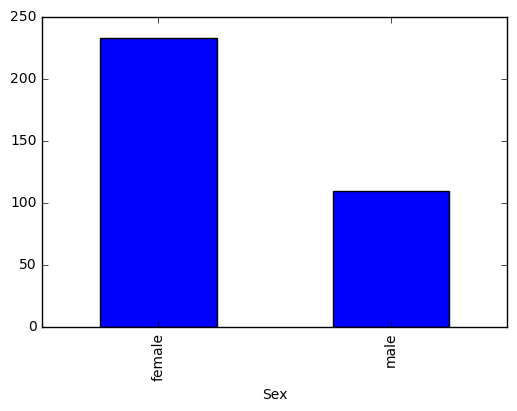

In [7]:


groups = titanic_df.groupby("Sex")["Survived"]
groups.sum().plot(kind='bar')

### - people in higher class luckily include more population of elder, child, and femail?